In [26]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Iteratively read files
import glob
import os

# For displaying images in ipython
from IPython.display import HTML, display
# Plotting libraries
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [41]:
# User defined function to read and store bbc data from multipe folders
def load_data(top_folders,folder_names,root_path):
    doc_list = [] # initiate empty list to store text from files
    
    for name in top_folders:

        fileNames = [path + '/' + name +'/'+ folder + '/*.txt' for path,folder in zip([root_path]*len(folder_names),
                                                                                   folder_names )]

        tags = folder_names
        for docs in fileNames:
            #print(docs)
            #print(type(docs))
            doc = glob.glob(docs) # glob method iterates through all the text documents in a folder
            for text in doc:
                with open(text, encoding='latin1') as f:
                    tag = docs.split('/')[8]
                    lines = f.readlines()
                    heading = lines[0].strip()
                    body = ' '.join([l.strip() for l in lines[1:]])
                    doc_list.append([tag, heading, body])
            print("Completed loading data from folder: %s"%tag)

        print("Completed Loading text from %s folder"%name)

    return doc_list

In [49]:
top_folders = ["enron1","enron2","enron3","enron4","enron5","enron6"]
folder_names = ['ham','spam']
docs = load_data(top_folders,folder_names = folder_names, root_path = os.getcwd())

Completed loading data from folder: ham
Completed loading data from folder: spam
Completed Loading text from enron1 folder
Completed loading data from folder: ham
Completed loading data from folder: spam
Completed Loading text from enron2 folder
Completed loading data from folder: ham
Completed loading data from folder: spam
Completed Loading text from enron3 folder
Completed loading data from folder: ham
Completed loading data from folder: spam
Completed Loading text from enron4 folder
Completed loading data from folder: ham
Completed loading data from folder: spam
Completed Loading text from enron5 folder
Completed loading data from folder: ham
Completed loading data from folder: spam
Completed Loading text from enron6 folder


In [50]:
docs = pd.DataFrame(docs, columns=['Category', 'Heading', 'Body'])
print(docs.tail())
print('\nShape of data is {}\n'.format(docs.shape))
print(docs.info())

      Category                                            Heading  \
33711     spam               Subject: fw : bigger cock ( cialis )   
33712     spam    Subject: feel great any time of the day summers   
33713     spam                     Subject: do you want a watch ?   
33714     spam          Subject: re ; your valium refill is ready   
33715     spam  Subject: unlicensed installation found on your...   

                                                    Body  
33711  call us on : l 8 oo order now or visit : http ...  
33712  up to 80 % savings on xanax , valium , phenter...  
33713                       http : / / inl . nepel . com  
33714  hi again , we now have over 94 meds available ...  
33715  get your peace of mind with our affordable sof...  

Shape of data is (33716, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 3 columns):
Category    33716 non-null object
Heading     33716 non-null object
Body        33716 non-nul

In [51]:
X_train, X_test, y_train, y_test = train_test_split(docs["Heading"], docs["Category"],random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((26972,), (6744,), (26972,))

In [52]:
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english",)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [53]:
model = clf.fit(X_train,y_train)

In [54]:
model.score(X_test,y_test)

0.9266014234875445

In [55]:
y_predicted = model.predict(X_test)

In [56]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[2993,  283],
       [ 212, 3256]])

In [57]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[2993  283]
 [ 212 3256]]
Normalized confusion matrix
[[0.91 0.09]
 [0.06 0.94]]


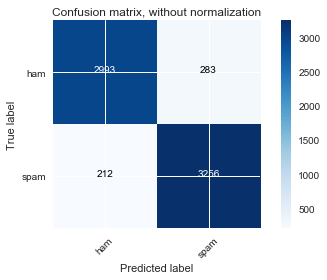

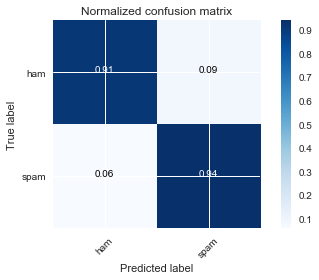

In [58]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ham','spam'],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= ['ham','spam'], normalize=True,title='Normalized confusion matrix')

plt.show()